In [1]:
# Learning about API wrappers, exception handling, and using Pandas with API responses

import json
import requests

In [34]:
# Navigate a Json File (Youtube)

filepath = 'youtube_response.json'
with open(filepath) as jsonfile:
    json_data = json.load(jsonfile)
val = json_data['data']['items'][0]

# Retrieve the video's title
print(f'The Title is: {val["title"]}.')

# Retrieve the video's rating
print(f'The rating is: {val["rating"]}.')

# Retrieve the link to the video's thumbnail
print(f'The Link is: {val["player"]["default"]}.')

# Retrieve the Number of views
print(f'The Number of Views is: {val["viewCount"]}.')

The Title is: Google Developers Day US - Maps API Introduction.
The rating is: 4.63.
The Link is: http://www.youtube.com/watch?vu003dhYB0mn5zh2c.
The Number of Views is: 220101.


In [44]:
response = requests.get('http://nyt-mongo-scraper.herokuapp.com/api/headlines').json()
print(f'The first response is: {json.dumps(response[0], indent=2)}.')
print(f'The last response is: {json.dumps(response[-1], indent=2)}.')
print(f'We Received {len(response)} responses.')

The first response is: {
  "saved": true,
  "_id": "5c91374e37fa9100142bb840",
  "headline": "A Mar-a-Lago Weekend and an Act of God: Trump\u2019s History With Deutsche BankCohen\u2019s Emails Were Sought by Special Counsel in July 2017, Records ShowHere are some of the revelations from The Times\u2019s investigation into Mr. Trump\u2019s ties to the bank.",
  "summary": "Federal authorities began investigating Michael D. Cohen, President Trump\u2019s former lawyer, only months after Mr. Trump took office.",
  "url": "https://www.nytimes.com/2019/03/18/business/trump-deutsche-bank.html",
  "date": "2019-03-19T18:39:10.710Z",
  "__v": 0
}.
The last response is: {
  "saved": true,
  "_id": "5c91374e37fa9100142bb840",
  "headline": "A Mar-a-Lago Weekend and an Act of God: Trump\u2019s History With Deutsche BankCohen\u2019s Emails Were Sought by Special Counsel in July 2017, Records ShowHere are some of the revelations from The Times\u2019s investigation into Mr. Trump\u2019s ties to the b

In [12]:
# 

key = '95ba9028e3c3203ff7ed52c0a97be499'
url = 'http://api.openweathermap.org/data/2.5/weather?q='
rest_of_url = '&units=metric&APPID='

query = input('Input a City and Country in Order to get todays weather (format example: London,uk)')


response = requests.get(url + query + rest_of_url + key).json()

print(f'The current temperature in {query} is {response["main"]["temp"]} Degrees Celsius.')


Input a City and Country in Order to get todays weather (format example: London,uk)London
The current temperature in London is 9.31 Degrees Celsius.


In [27]:
# Reads a List of Data to an API, Create a DataFrame from the responses
# and then display the data in a graph

url = 'https://api.tvmaze.com/singlesearch/shows?q='
shows = ['Altered Carbon',"Grey's Anatomy","This is Us","The Flash","The Sopranos","Shameless","Arrow","Westworld","Peaky Blinders"]

show_list = []
rating = []

for show in shows:
    response = requests.get(url+show).json()
    rating.append(response['rating']['average'])
    show_list.append(show)
movie_dict = {
    'Show':show_list,
    'Ratings':rating
}

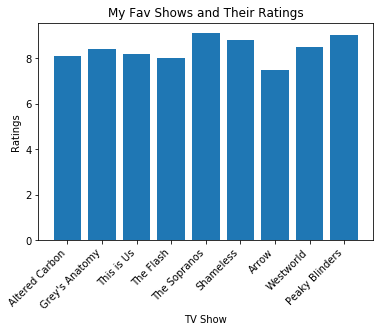

In [43]:
import matplotlib.pyplot as plt

plt.bar(movie_dict['Show'],movie_dict['Ratings'],align='center')
plt.xticks(rotation=45 , ha='right')
plt.ylabel('Ratings')
plt.xlabel('TV Show')
plt.title('My Fav Shows and Their Ratings')
plt.show()

In [59]:
# Using API Wrappers

import openweathermapy as ow
cities = ['Paris','London','Oslo','Beijing','Moscow','Vladivostok','Osaka','Honolulu','Montevideo','Erbil']

settings = {'units':'metric','appid':key}

temp_data = []
long = []
lat = []
all_city =[city for city in cities]
for city in cities:
    weather = ow.get_current(city,**settings)
    
    temperature = ['main.temp']
    longitude = ['coord.lon']
    latitude = ['coord.lat']
    
    temp = weather(*temperature)
    data = weather(*longitude)
    data_lat = weather(*latitude)
    
    all_city.append(city)
    temp_data.append(temp)
    long.append(data)
    lat.append(data_lat)
    
weather_dict = {
    'City':all_city,
    'Latitude':lat,
    'Longitude':long
}


In [60]:
weather_dict


{'City': ['Paris',
  'London',
  'Oslo',
  'Beijing',
  'Moscow',
  'Vladivostok',
  'Osaka',
  'Honolulu',
  'Montevideo',
  'Erbil'],
 'Latitude': [48.86,
  51.51,
  59.91,
  39.91,
  55.75,
  43.12,
  34.7,
  21.3,
  44.94,
  36.19],
 'Longitude': [2.35,
  -0.13,
  10.74,
  116.39,
  37.62,
  131.89,
  135.5,
  -157.86,
  -95.72,
  44.01]}